In [1]:
import re
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.sparse
import scanpy.external as sce
import sklearn.manifold
import statsmodels.api as sm

# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pyclustering.cluster.kmedoids import kmedoids

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sb

import scanpy as sc
import harmonypy as hm
import anndata
import pickle
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
from scipy.stats import chi2_contingency
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
import os
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

### Load Data

In [2]:
SC_DF = sc.read_h5ad('.h5ad')

### Seperate Biological Replicates

In [3]:
Sample_List = ['WT:R1','EXON:R1','ENH3:R1', 'ENH5:R1', 'WT:R2','EXON:R2','ENH3:R2', 'ENH5:R2']
Sample_Col = [0,1,2,3,0,1,2,3]

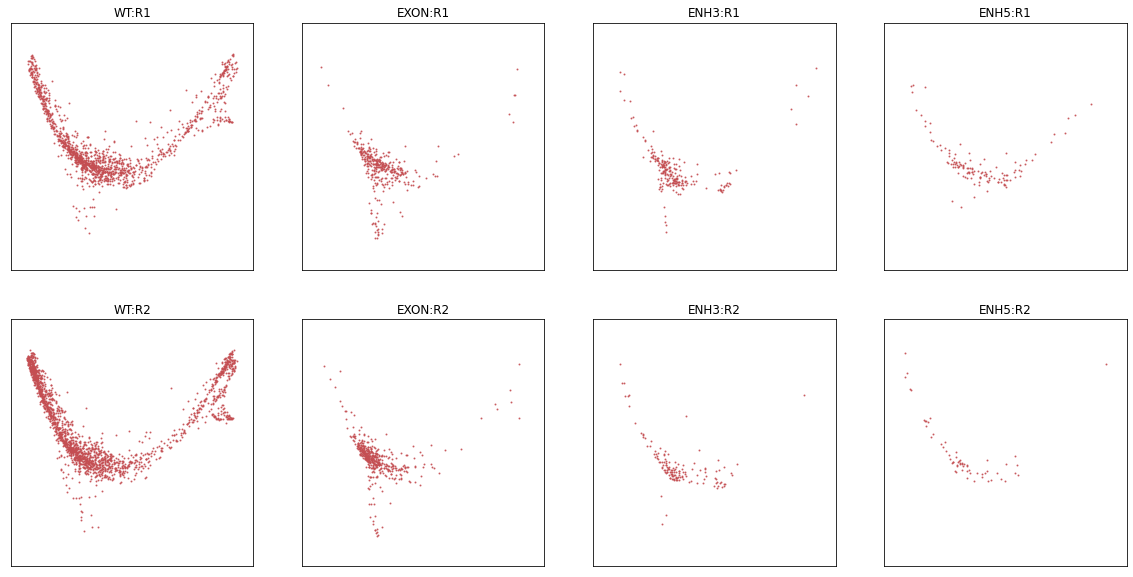

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10), sharex=False)

lim_adj = 5

ylim_min = SC_DF.obsm['X_phate'][:,1].min() - lim_adj
ylim_max = SC_DF.obsm['X_phate'][:,1].max() + lim_adj
xlim_min = SC_DF.obsm['X_phate'][:,0].min() - lim_adj
xlim_max = SC_DF.obsm['X_phate'][:,0].max() + lim_adj


for i,sample in enumerate(Sample_List):

    
    
    if sample.split(':')[1] == 'R1':
        row_set = 0
    else:
        row_set = 1
    col_set = Sample_Col[i]
        
    ax=axes[row_set,col_set]

    x = SC_DF[SC_DF.obs.B_Reps == sample].obsm['X_phate'][:,0]
    y = SC_DF[SC_DF.obs.B_Reps == sample].obsm['X_phate'][:,1]
    ax.scatter(x, 
               y, 
               c='#c44e52',
               s=1,
            alpha=0.8
              )
    #plt.xlim(SC_DF.obsm['X_phate'][:,0].min() - 10, SC_DF.obsm['X_phate'][:,0].max() + 10)
    #print('x_min = ' + str(SC_DF.obsm['X_phate'][:,0].min() - 10) + ' x_max = ' + str(SC_DF.obsm['X_phate'][:,0].max() + 10))
    #plt.ylim(SC_DF.obsm['X_phate'][:,1].min() - 50, SC_DF.obsm['X_phate'][:,1].max() + 50)
    #print('y_min = ' + str(SC_DF.obsm['X_phate'][:,1].min() - 10) + ' y_max = ' + str(SC_DF.obsm['X_phate'][:,1].max() + 10))

    
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(sample)
    ax.grid(False)
    
    
plt.savefig('png', dpi = 600)

In [4]:
Sample_List = ['WT','EXON','ENH3', 'ENH5']
Sample_Col = [0,1,0,1]

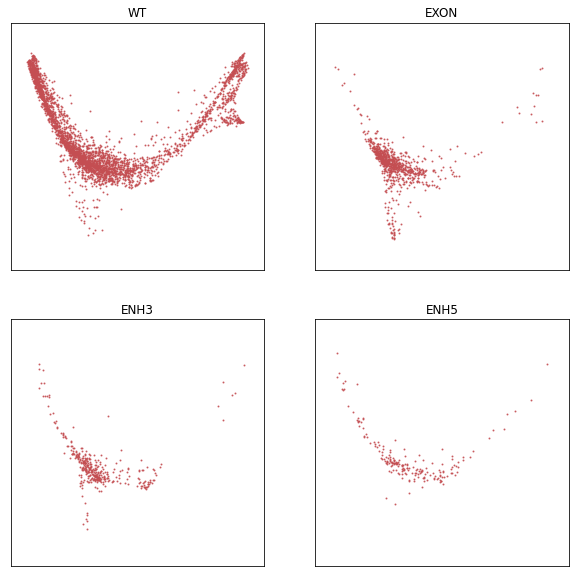

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=False)

lim_adj = 5

ylim_min = SC_DF.obsm['X_phate'][:,1].min() - lim_adj
ylim_max = SC_DF.obsm['X_phate'][:,1].max() + lim_adj
xlim_min = SC_DF.obsm['X_phate'][:,0].min() - lim_adj
xlim_max = SC_DF.obsm['X_phate'][:,0].max() + lim_adj


for i,sample in enumerate(Sample_List):

    
    
    if sample == 'WT' or sample == 'EXON':
        row_set = 0
    else:
        row_set = 1
        
    col_set = Sample_Col[i]
        
    ax=axes[row_set,col_set]

    x = SC_DF[SC_DF.obs.Sample == sample].obsm['X_phate'][:,0]
    y = SC_DF[SC_DF.obs.Sample == sample].obsm['X_phate'][:,1]
    ax.scatter(x, 
               y, 
               c='#c44e52',
               s=1,
            alpha=0.8
              )
    
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(sample)
    ax.grid(False)
    
    
plt.savefig('png', dpi = 600)

### SG Distribution

In [5]:
#### NC Cells
sg_pos_cell_WT = []
for bc in SC_DF.obs.index:
    if bc in SC_DF[SC_DF.obs['Sample'] == 'WT'].obs.index:
        sg_pos_cell_WT.append(1)
    else:
        sg_pos_cell_WT.append(0)

In [6]:
#### ENH3 Cells
sg_pos_cell_ENH3 = []
for bc in SC_DF.obs.index:
    if bc in SC_DF[SC_DF.obs['Sample'] == 'ENH3'].obs.index:
        sg_pos_cell_ENH3.append(1)
    else:
        sg_pos_cell_ENH3.append(0)

In [7]:
#### ENH5 Cells
sg_pos_cell_ENH5 = []
for bc in SC_DF.obs.index:
    if bc in SC_DF[SC_DF.obs['Sample'] == 'ENH5'].obs.index:
        sg_pos_cell_ENH5.append(1)
    else:
        sg_pos_cell_ENH5.append(0)

In [8]:
#### EXON Cells
sg_pos_cell_EXON = []
for bc in SC_DF.obs.index:
    if bc in SC_DF[SC_DF.obs['Sample'] == 'EXON'].obs.index:
        sg_pos_cell_EXON.append(1)
    else:
        sg_pos_cell_EXON.append(0)

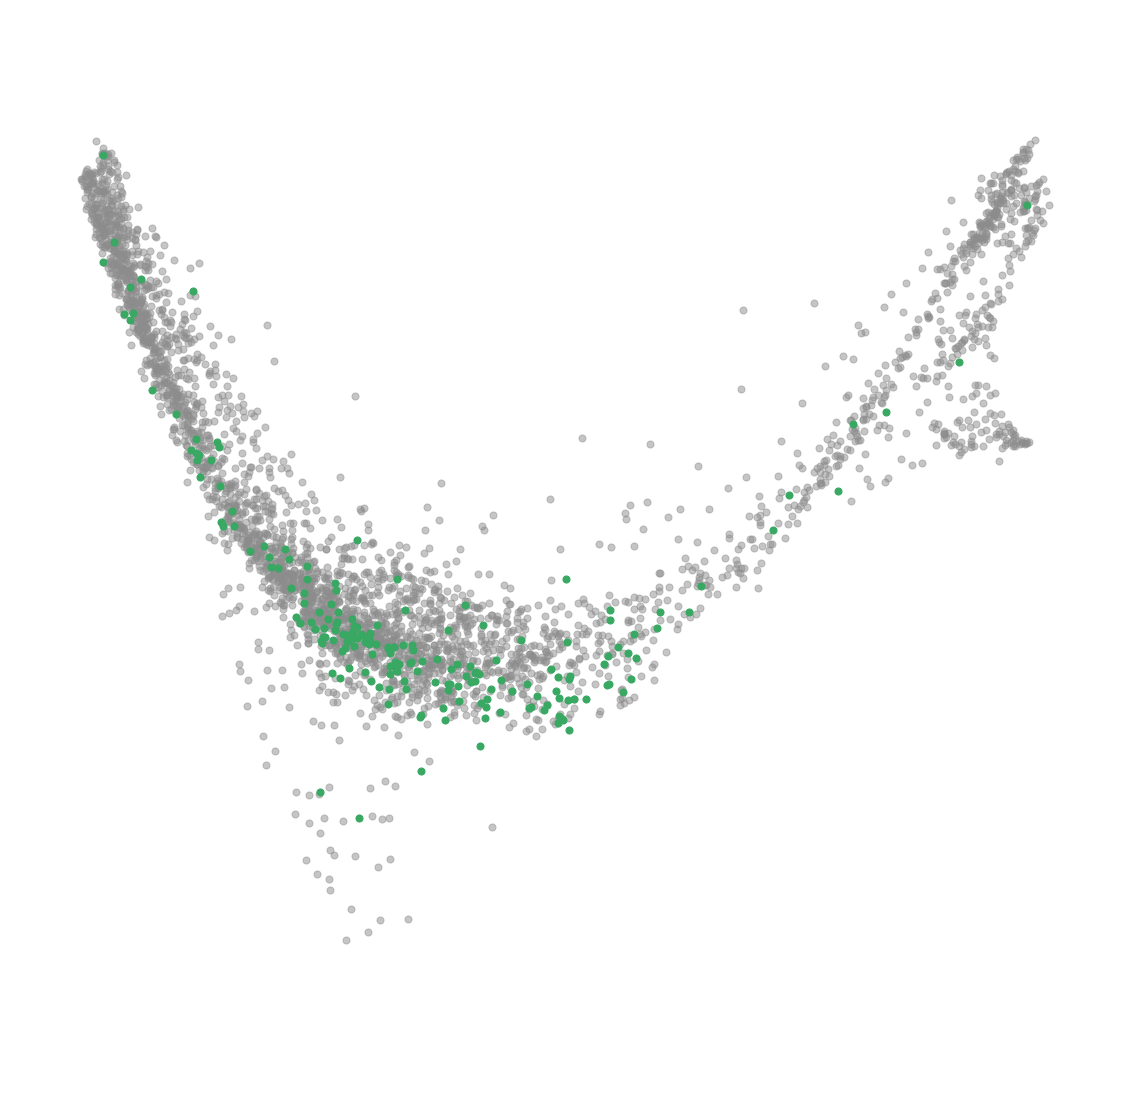

In [10]:
fig, ax = plt.subplots(figsize=(20,20))

lim_adj = 5
ylim_min = SC_DF.obsm['X_phate'][:,1].min() - lim_adj
ylim_max = SC_DF.obsm['X_phate'][:,1].max() + lim_adj
xlim_min = SC_DF.obsm['X_phate'][:,0].min() - lim_adj
xlim_max = SC_DF.obsm['X_phate'][:,0].max() + lim_adj


indices = np.nonzero(sg_pos_cell_WT)[0]
x = SC_DF.obsm['X_phate'][indices,0]
y = SC_DF.obsm['X_phate'][indices,1]
ax.scatter(x, 
           y, 
           c='#8c8c8c',
           s=50,
        alpha=0.5)

indices = np.nonzero(sg_pos_cell_ENH5)[0]
x = SC_DF.obsm['X_phate'][indices,0]
y = SC_DF.obsm['X_phate'][indices,1]
ax.scatter(x, 
           y, 
           c='#38A863',
           s=50,
        alpha=1)


plt.axis('off')
#ax.legend(['Undetected', 'NC', 'TBX5 Enhancer sgRNA'])
ax.grid(False)

ax.set_xlim(xlim_min, xlim_max)
ax.set_ylim(ylim_min, ylim_max)

#ax.set_title(str(query_region) + '___Cells:' + str(sum(sg_pos_cell)))
plt.savefig('./CM_PKATE_Distribution_ENH5.png')